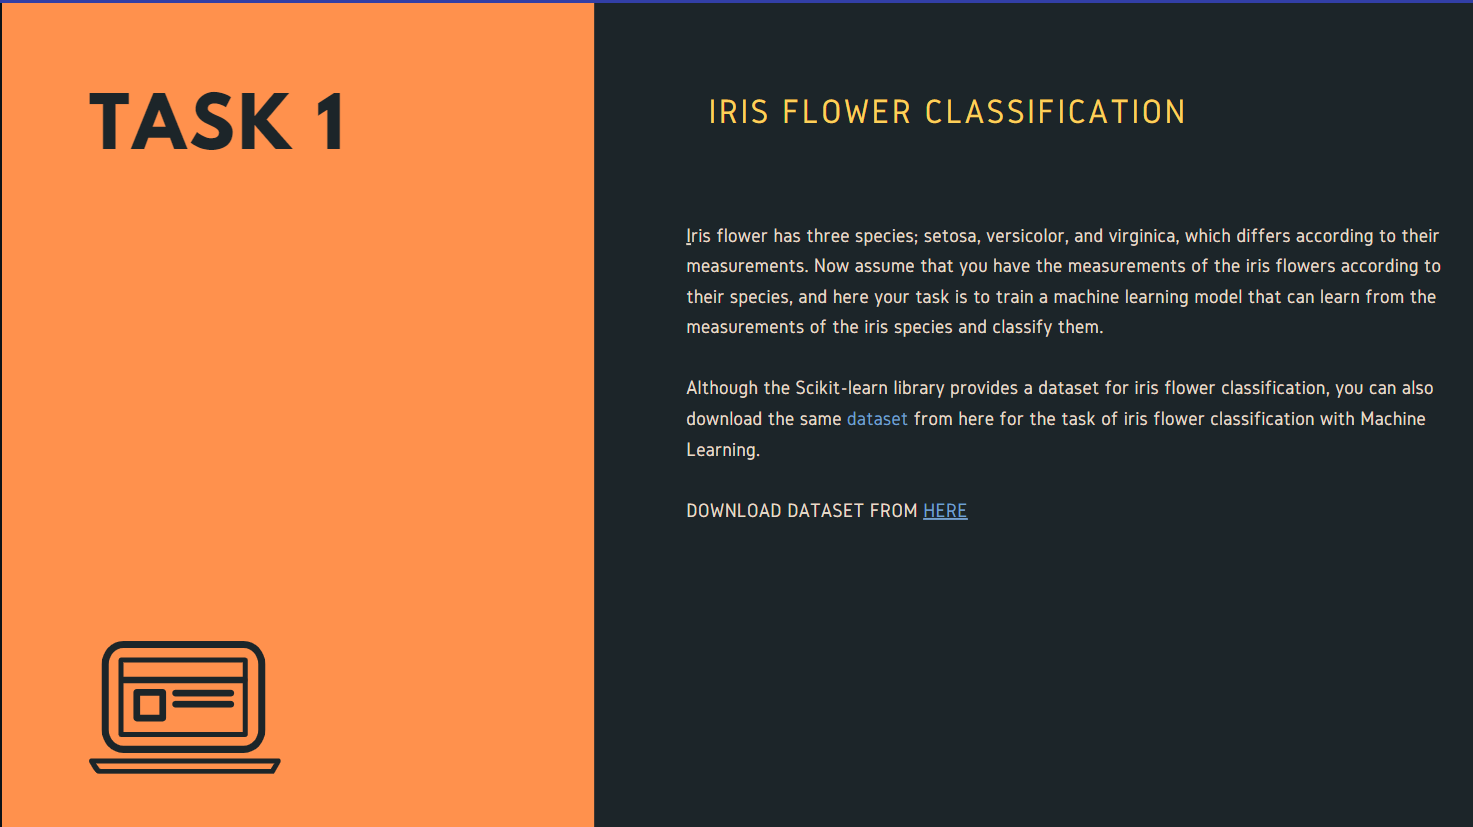

## Importing Required Libraries

In [1]:
#importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

## Explorartory Data Analysis

In [3]:
#EDA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


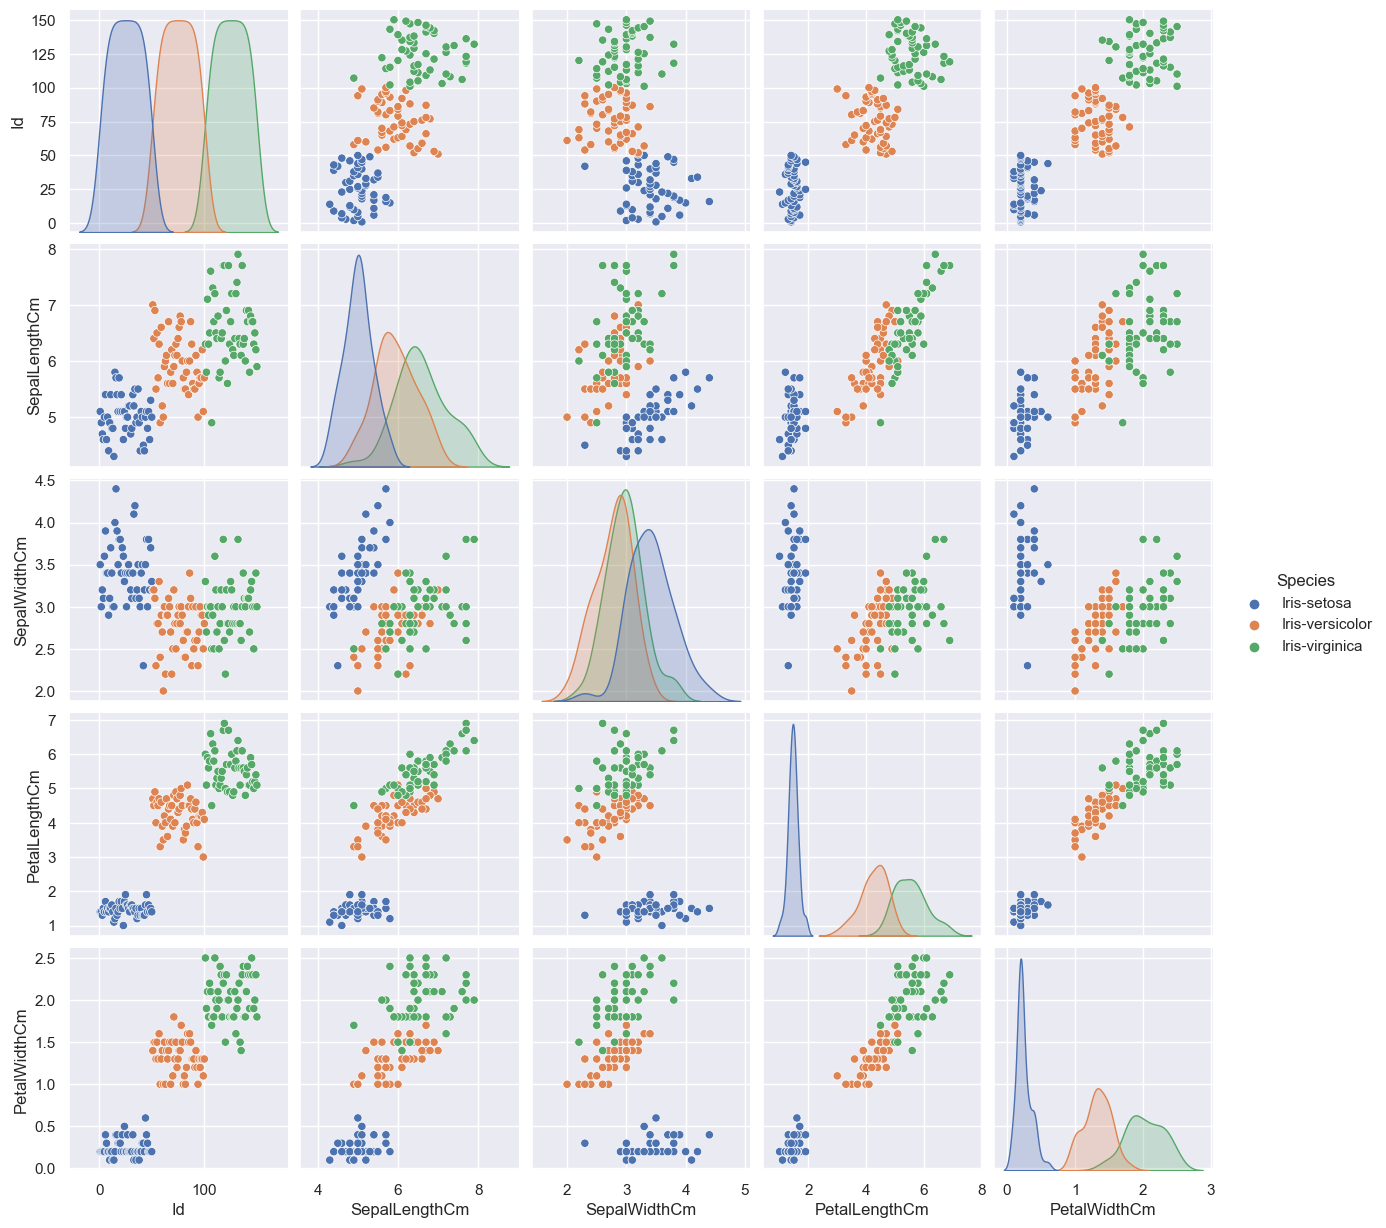

In [4]:
sns.pairplot(dataset, hue = 'Species')

In [5]:
import plotly.express as px

def plot_eda(dataset, X, Y):
    figure = px.bar(dataset, x=X, y=Y, title=f"{X} vs {Y}",
                   labels={"x": X, "y": Y})
    figure.update_layout(xaxis_tickangle=-45)
    figure.update_xaxes(title_text=X)
    figure.update_yaxes(title_text=Y)
    figure.show()


In [6]:
plot_eda(dataset, 'Species', 'SepalWidthCm' )

In [7]:
plot_eda(dataset, 'Species', 'SepalWidthCm' )

In [8]:
plot_eda(dataset, 'Species', 'PetalLengthCm' )

In [9]:
plot_eda(dataset, 'Species', 'PetalWidthCm' )

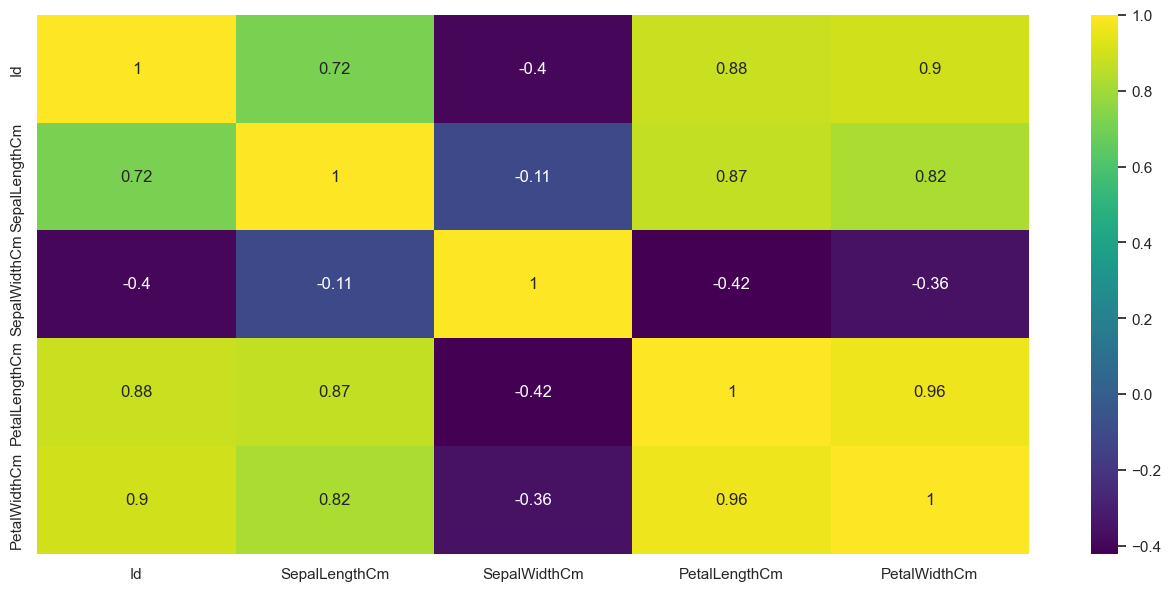

In [10]:
plt.figure(figsize=(16,7))
sns.heatmap(dataset.corr(), annot =True, cmap='viridis')
plt.show()

## Data Preprocessing

In [11]:
#Data Preprocessing
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
dataset.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [13]:
# as we not required ID column
dataset.drop('Id', axis = 1, inplace = True)

In [14]:
from sklearn.preprocessing import LabelEncoder
enco = LabelEncoder()
dataset['Species'] = enco.fit_transform(dataset['Species'])

## Splitting Data into Dependent and Independent Variables

In [15]:
#splitting dependent and independent variables
x = dataset.iloc[:, 0:4]
x.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [16]:
y = dataset['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

## Train-Test split

In [17]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 41, stratify = y )

## Model Building
1. Logistic Regression
2. Decision Tree
3. Random Forest Classifier
4. XGBoost
5. Bagging Classifier

In [18]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
def model_report(model):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    print("Classification Report train-dataset: ", classification_report(y_train, y_pred_train))
    print("Classification Report test-dataset: ", classification_report(y_test, y_pred_test))
    
    print("****"*10)
    
    print("Accuracy score train-report: ", accuracy_score(y_train, y_pred_train))
    print("Accuracy score test-report: ", accuracy_score(y_test, y_pred_test))
    
    print("****"*10)
    
    print("Confusion Matrix train-dataset: ", confusion_matrix(y_train, y_pred_train))
    print("Confusion Matrix test-dataset: ", confusion_matrix(y_test, y_pred_test))

In [20]:
model_report(logit_model)

Classification Report train-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.95      0.95        40
           2       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Classification Report test-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

****************************************
Accuracy score train-report:  0.9666666666666667
Accuracy score test-report:  0.9333333333333333
*************************

In [21]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
model_report(dtree)

Classification Report train-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Classification Report test-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

****************************************
Accuracy score train-report:  1.0
Accuracy score test-report:  0.9333333333333333
****************************************

In [23]:
#RFc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
model_report(rfc)

Classification Report train-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Classification Report test-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

****************************************
Accuracy score train-report:  1.0
Accuracy score test-report:  0.9
****************************************
Confusion Matr

In [25]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
model_report(xgb)

Classification Report train-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Classification Report test-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

****************************************
Accuracy score train-report:  1.0
Accuracy score test-report:  0.9
****************************************
Confusion Matr

In [27]:
#bgc
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(x_train, y_train)

BaggingClassifier()

In [28]:
model_report(bgc)

Classification Report train-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Classification Report test-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

****************************************
Accuracy score train-report:  0.9916666666666667
Accuracy score test-report:  0.9
****************************************

## Hyperparameter Tunning with RandomizedSearchCV

In [29]:
#Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_grid = {
    'Logistic Regression': {'C': uniform(0.01, 100)},
    'Decision Tree': {'max_depth': randint(1, 20)},
    'Random Forest': {'n_estimators': randint(10, 200), 'max_depth': randint(1, 20)},
    'XGBoost': {'learning_rate': uniform(0.01, 0.1), 'n_estimators': randint(50, 300)},
    'Bagging Classifier': {
    
    'n_estimators': randint(10, 200),
    'max_samples': uniform(0.5, 0.5),
    'max_features': uniform(0.5, 0.5),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

}

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Bagging Classifier': BaggingClassifier()
}
best_scores = {}

for clf_name, clf in classifiers.items():
    print(f"Performing RandomizedSearchCV for {clf_name}")
    random_search = RandomizedSearchCV(clf, param_distributions=param_grid[clf_name], n_iter=20, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(x_train, y_train)

    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best score: {random_search.best_score_:.4f}")

    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    print()
    
    best_scores[clf_name] = random_search.best_score_
figure = px.bar(x=list(best_scores.keys()), y=list(best_scores.values()), color=list(best_scores.keys()), 
                labels={'x': 'Classifier', 'y': 'Best Score'})

figure.update_layout(title='Best Scores of Classifiers from RandomizedSearchCV',
                     xaxis_tickangle=-45)

figure.show()

Performing RandomizedSearchCV for Logistic Regression
Best parameters: {'C': 15.609452033620265}
Best score: 0.9833
Accuracy on test set: 0.9333

Performing RandomizedSearchCV for Decision Tree
Best parameters: {'max_depth': 2}
Best score: 0.9750
Accuracy on test set: 0.9000

Performing RandomizedSearchCV for Random Forest
Best parameters: {'max_depth': 15, 'n_estimators': 116}
Best score: 0.9667
Accuracy on test set: 0.9000

Performing RandomizedSearchCV for XGBoost
Best parameters: {'learning_rate': 0.047454011884736254, 'n_estimators': 142}
Best score: 0.9500
Accuracy on test set: 0.9000

Performing RandomizedSearchCV for Bagging Classifier
Best parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5924272277627636, 'max_samples': 0.9847923138822793, 'n_estimators': 53}
Best score: 0.9750
Accuracy on test set: 0.9000



## Best Model :- Logistic Regression

#### Best parameters:
- {'C': 15.609452033620265}
- Best score: 0.9833
- Accuracy on test set: 0.9333

#### Training Best Model

In [30]:
logit_model2 = LogisticRegression(C = 15.609452033620265) 
logit_model2.fit(x_train, y_train)

LogisticRegression(C=15.609452033620265)

### Checking Performances

In [31]:
model_report(logit_model2)

Classification Report train-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Classification Report test-dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

****************************************
Accuracy score train-report:  0.9916666666666667
Accuracy score test-report:  0.9333333333333333
*************************

## Conclusion: -

Based on the results of the RandomizedSearchCV performed across various machine learning models, it's evident that Logistic Regression emerges as the best-performing model for the task of Iris classification prediction. With a tuned regularization parameter (C) value of approximately 15.61, Logistic Regression achieved an impressive accuracy score of 98.33% on the training data, indicating its strong predictive capabilities. Subsequently, on the test set, it demonstrated a commendable accuracy of 93.33%.